In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
# Current folder containing the data
data_folder = Path("./")

files = sorted(data_folder.glob("listings_*_2025.csv"))

dfs = []

for f in files:
    # Extract the month name between "listings_" and "_2025"
    month_str = f.stem.split("_")[1]

    df = pd.read_csv(f)

    df["month"] = month_str

    dfs.append(df)
# Create a larger, full dataframe containing all months for 2025
full_df = pd.concat(dfs, ignore_index=True)

print("Loaded files:")
for f in files:
    print(" -", f.name)

print("\nFinal combined shape:", full_df.shape)

Loaded files:
 - listings_April_2025.csv
 - listings_August_2025.csv
 - listings_December_2025.csv
 - listings_February_2025.csv
 - listings_January_2025.csv
 - listings_July_2025.csv
 - listings_June_2025.csv
 - listings_March_2025.csv
 - listings_May_2025.csv
 - listings_November_2025.csv
 - listings_October_2025.csv
 - listings_September_2025.csv

Final combined shape: (441156, 82)


In [4]:
pd.set_option('display.max_columns', None)
display(full_df)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,month,host_profile_id,neighbourhood_group
0,2539,https://www.airbnb.com/rooms/2539,2.025040e+13,2025-04-02,city scrape,Superfast Wi-Fi. Clean & quiet home by the park,Renovated apt home in elevator building.,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within an hour,100%,81%,f,https://a0.muscache.com/im/pictures/user/86745...,https://a0.muscache.com/im/pictures/user/86745...,Gravesend,4.0,13.0,"['email', 'phone']",t,t,Neighborhood highlights,Kensington,Brooklyn,40.645290,-73.972380,Private room in rental unit,Private room,2.0,1.0,1 private bath,1.0,1.0,"[""Microwave"", ""Portable fans"", ""Free street pa...",$128.00,30,730.0,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,23.0,53.0,83.0,358,2025-04-02,9,0,0.0,267.0,0.0,0.0,0.0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.00,4.75,4.88,NaN,f,4,0.0,4.0,0.0,0.08,April,NaN,NaN
1,6872,https://www.airbnb.com/rooms/6872,2.025040e+13,2025-04-02,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,https://a0.muscache.com/pictures/miso/Hosting-...,16104,https://www.airbnb.com/users/show/16104,Kahshanna,2009-05-07,"New York, NY",A former life in fashion and wellness has left...,within a few hours,100%,33%,f,https://a0.muscache.com/im/pictures/user/d865a...,https://a0.muscache.com/im/pictures/user/d865a...,East Harlem,2.0,2.0,"['email', 'phone', 'work_email']",t,f,Neighborhood highlights,East Harlem,Manhattan,40.801070,-73.942550,Private room in condo,Private room,1.0,1.0,1 shared bath,1.0,1.0,"[""Dryer"", ""Elevator"", ""Hangers"", ""Hot water"", ...",$59.00,30,180.0,30.0,30.0,180.0,180.0,30.0,180.0,NaN,t,23.0,53.0,83.0,83,2025-04-02,1,0,0.0,83.0,0.0,0.0,0.0,2022-06-05,2022-06-05,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,2,0.0,2.0,0.0,0.03,April,NaN,NaN
2,7064,https://www.airbnb.com/rooms/7064,2.025040e+13,2025-04-02,previous scrape,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",https://a0.muscache.com/pictures/13708959/7e74...,17297,https://www.airbnb.com/users/show/17297,Joelle,2009-05-15,"New York, NY",I have lived in the same apartment in Brooklyn...,a few days or more,0%,0%,f,https://a0.muscache.com/im/users/17297/profile...,https://a0.muscache.com/im/users/17297/profile...,Williamsburg,2.0,2.0,"['email', 'phone', 'work_

In [5]:
full_df[full_df['month'] == 'December']

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,month,host_profile_id,neighbourhood_group
73550,2539,NaN,NaN,NaN,NaN,Superfast Wi-Fi. Clean & quiet home by the park,NaN,NaN,NaN,2787,NaN,John,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kensington,NaN,NaN,40.64529,-73.97238,NaN,Private room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN,9,0,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,0.07,December,1.462506e+18,Brooklyn
73551,2595,NaN,NaN,NaN,NaN,Skylit Studio Oasis | Midtown Manhattan Sanctuary,NaN,NaN,NaN,2845,NaN,Jennifer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,40.75356,-73.98559,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319,NaN,47,0,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,0.24,December,1.462506e+18,Manhattan
73552,6848,NaN,NaN,NaN,NaN,Only 2 stops to Manhattan studio,NaN,NaN,NaN,15991,NaN,Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Williamsburg,NaN,NaN,40.70935,-73.95342,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,NaN,197,4,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,0.98,December,1.462507e+18,Brooklyn
73553,6872,NaN,NaN,NaN,NaN,Uptown Sanctuary w/ Private Bath (Month to Month),NaN,NaN,NaN,16104,NaN,Kahshanna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Harlem,NaN,NaN,40.80107,-73.94255,NaN,Private room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,2025-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,0.05,December,1.462507e+18,Manhattan
73554,6990,NaN,NaN,NaN,NaN,UES Beautiful Blue Room,NaN,NaN,NaN,16800,NaN,Cynthia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,East Harlem,NaN,NaN,40.78778,-73.94759,NaN,Private room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,250,3,NaN,NaN,NaN,NaN,NaN,NaN,2025-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1.27,December,1.462507e+18,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109806,1567403299676323885,NaN,NaN,NaN,NaN,Elegant West Village Hideaway on Ca

# Let's preprocess some of the data

In [6]:
# Remove the dollar sign from the price column to prevent errors later
full_df['price'] = full_df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
full_df['price'] = pd.to_numeric(full_df['price'], errors='coerce')

month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

full_df['month_num'] = full_df['month']
full_df['month_num'] = full_df['month_num'].map(month_mapping)

print(full_df.columns)
print(full_df.describe())

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [7]:
full_df = full_df[full_df['price'] < 5000]

In [8]:
# Calculate count, mean, median, std for boroughs
def calculate_rental_stats(df):
  """
    Calculates mean, median, standard deviation on pandas dataframe containing differently monthly price data.

    param1: (pandas df) to compute statistics on

    returns: (pandas df) with mean, median, std columns
  """
  # Use the groupby and aggregate methods from pandas to calculate basic statistics
  stats_per_month = df.groupby('month_num')['price'].agg(['count', 'mean', 'median', 'std']).sort_index()

  # Use the pandas to_datetime as an easy way to convert numbers back to months in a lambda function
  stats_per_month['month'] = stats_per_month.index.map(lambda x: pd.to_datetime(str(x), format='%m').month_name())

  return stats_per_month

monthly_stats = calculate_rental_stats(full_df)
display(
    monthly_stats.style
        .format({'count':'{:,.0f}', 'mean':'{:,.2f}', 'median':'{:,.2f}', 'std':'{:,.2f}'})
        .background_gradient(cmap='Blues', subset=['median'])
        .background_gradient(cmap='Greens', subset=['mean'])
)

,count,mean,median,std,month
month_num,,,,,
1,"22,956",189.40,132.00,231.57,January
2,"23,178",187.13,130.00,227.18,February
3,"22,289",204.41,140.00,246.46,March
4,"22,108",212.27,145.00,251.65,April
5,"21,814",223.84,150.00,268.09,May
6,"21,295",224.95,152.00,268.87,June
7,"21,163",220.57,151.00,261.62,July
8,"21,155",219.76,150.00,261.18,August
9,"21,010",231.15,150.00,276.80,September


In [9]:
# Let's see how much more expensive Manhattan is compared to the rest

# Average price in Manhattan
manhattan_avg = full_df[full_df['neighbourhood_group_cleansed'] == "Manhattan"]['price'].mean()

# Average price in all other boroughs (exclude Manhattan)
other_boroughs_avg = full_df[full_df['neighbourhood_group_cleansed'] != "Manhattan"]['price'].mean()

print("Average price in Manhattan:", manhattan_avg)
print("Average price in other boroughs:", other_boroughs_avg)

# Comparison table
comparison = pd.DataFrame({
    "Manhattan_avg_price": [manhattan_avg],
    "Other_boroughs_avg_price": [other_boroughs_avg]
})

print("\nComparison table:")
print(comparison)

print(f'\nRatio of Manhattan Average to Other Boroughs {manhattan_avg / other_boroughs_avg}')

Average price in Manhattan: 288.52671164237086
Average price in other boroughs: 163.78425938269612

Comparison table:
   Manhattan_avg_price  Other_boroughs_avg_price
0           288.526712                163.784259

Ratio of Manhattan Average to Other Boroughs 1.761626622300762


# Checking number of "luxury" listings, where price is greater than $1000

In [10]:
ultra = full_df[full_df['price'] > 1000]

ultra_counts = ultra['neighbourhood_group_cleansed'].value_counts()
ultra_counts

neighbourhood_group_cleansed
Manhattan        2406
Brooklyn          382
Queens             92
Staten Island      21
Bronx              15
Name: count, dtype: int64

In [11]:
full_df.groupby('neighbourhood_group_cleansed')['price'].std().sort_values(ascending=False)

neighbourhood_group_cleansed
Manhattan        319.728187
Brooklyn         189.842859
Queens           136.866253
Staten Island    132.776839
Bronx            106.376617
Name: price, dtype: float64

In [12]:
zero_count = full_df[full_df['price'] == 0].shape[0]
print(zero_count)

0


# Let's visualize the distribution of prices per borough using histograms.

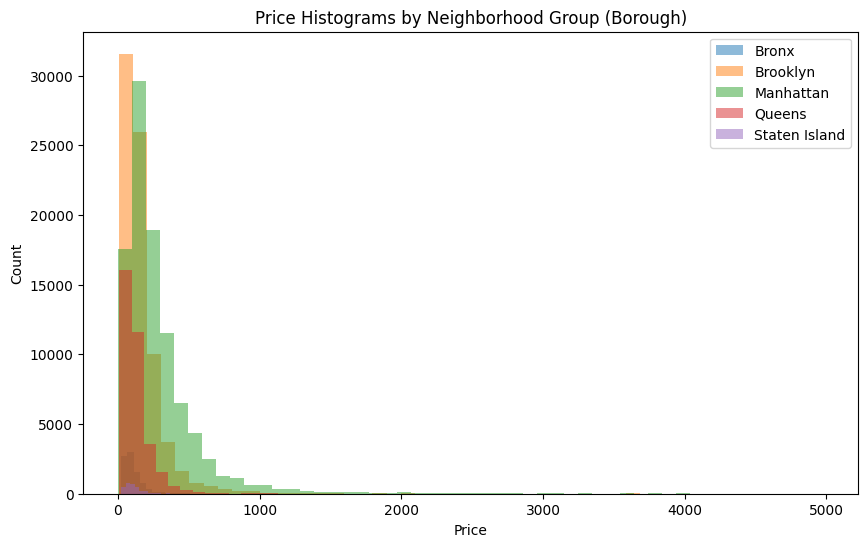

In [13]:
# df = full_df[full_df['month'] == 'October']
df = full_df
prices_per_borough = df[['neighbourhood_group_cleansed', 'price']]

plt.figure(figsize=(10,6))

for group, subset in df.groupby("neighbourhood_group_cleansed"):
    plt.hist(subset["price"].dropna(), bins=50, alpha=0.5, label=group)

plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price Histograms by Neighborhood Group (Borough)")
plt.legend()
plt.show()

# Plot on log scale so outliers don't ruin graph

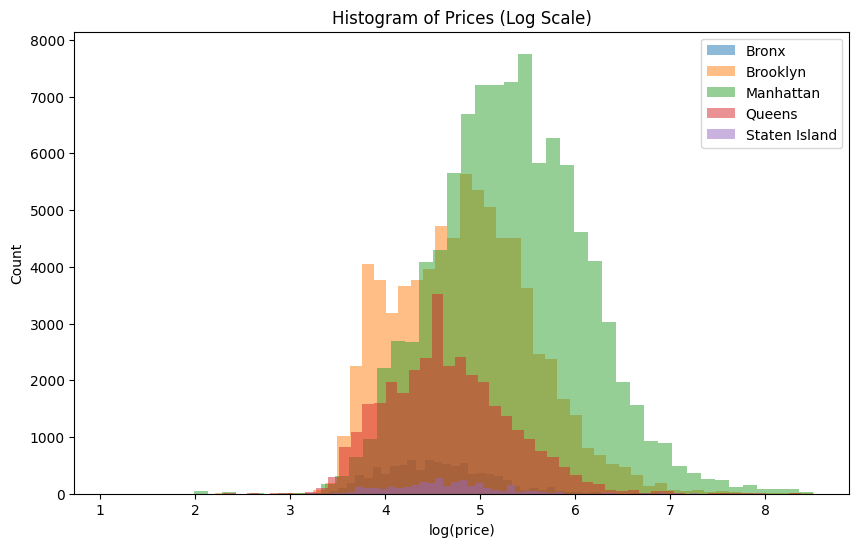

In [14]:
plt.figure(figsize=(10,6))
for group, subset in df.groupby("neighbourhood_group_cleansed"):
    plt.hist(np.log(subset["price"]), bins=50, alpha=0.5, label=group)

plt.xlabel("log(price)")
plt.ylabel("Count")
plt.title("Histogram of Prices (Log Scale)")
plt.legend()
plt.show()

# Zoom in on Manhattan specifically, separating by neighbourhoods

32

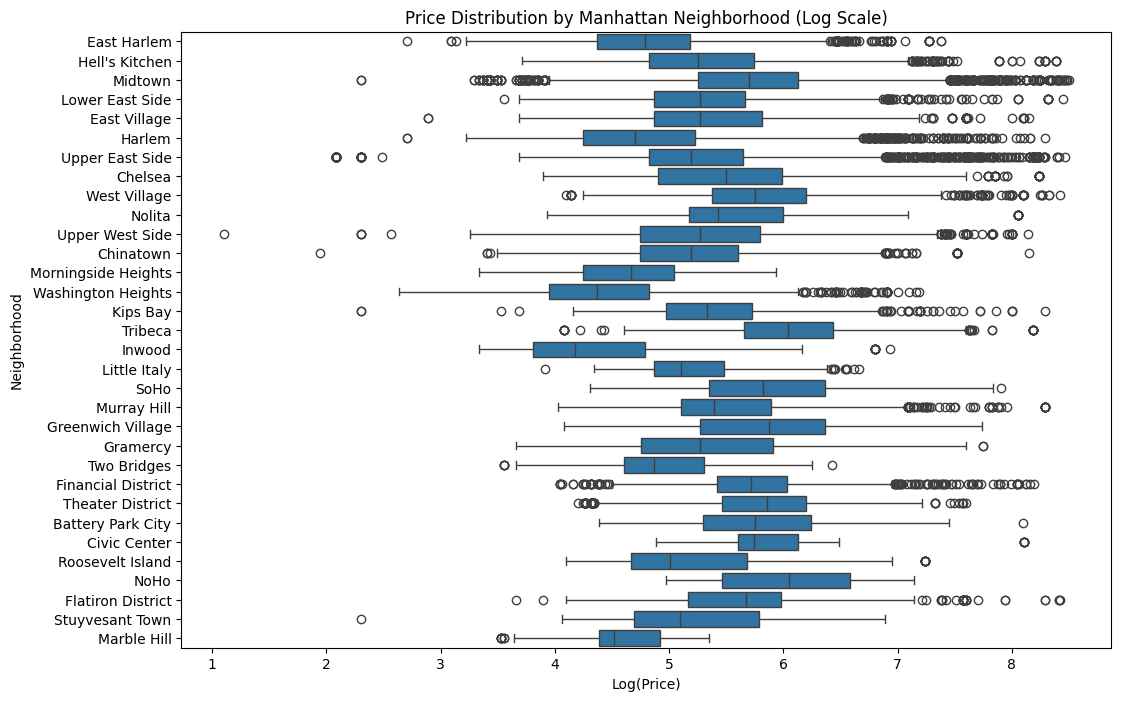

C:\Users\Jett\AppData\Local\Temp\ipykernel_39440\2894278923.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


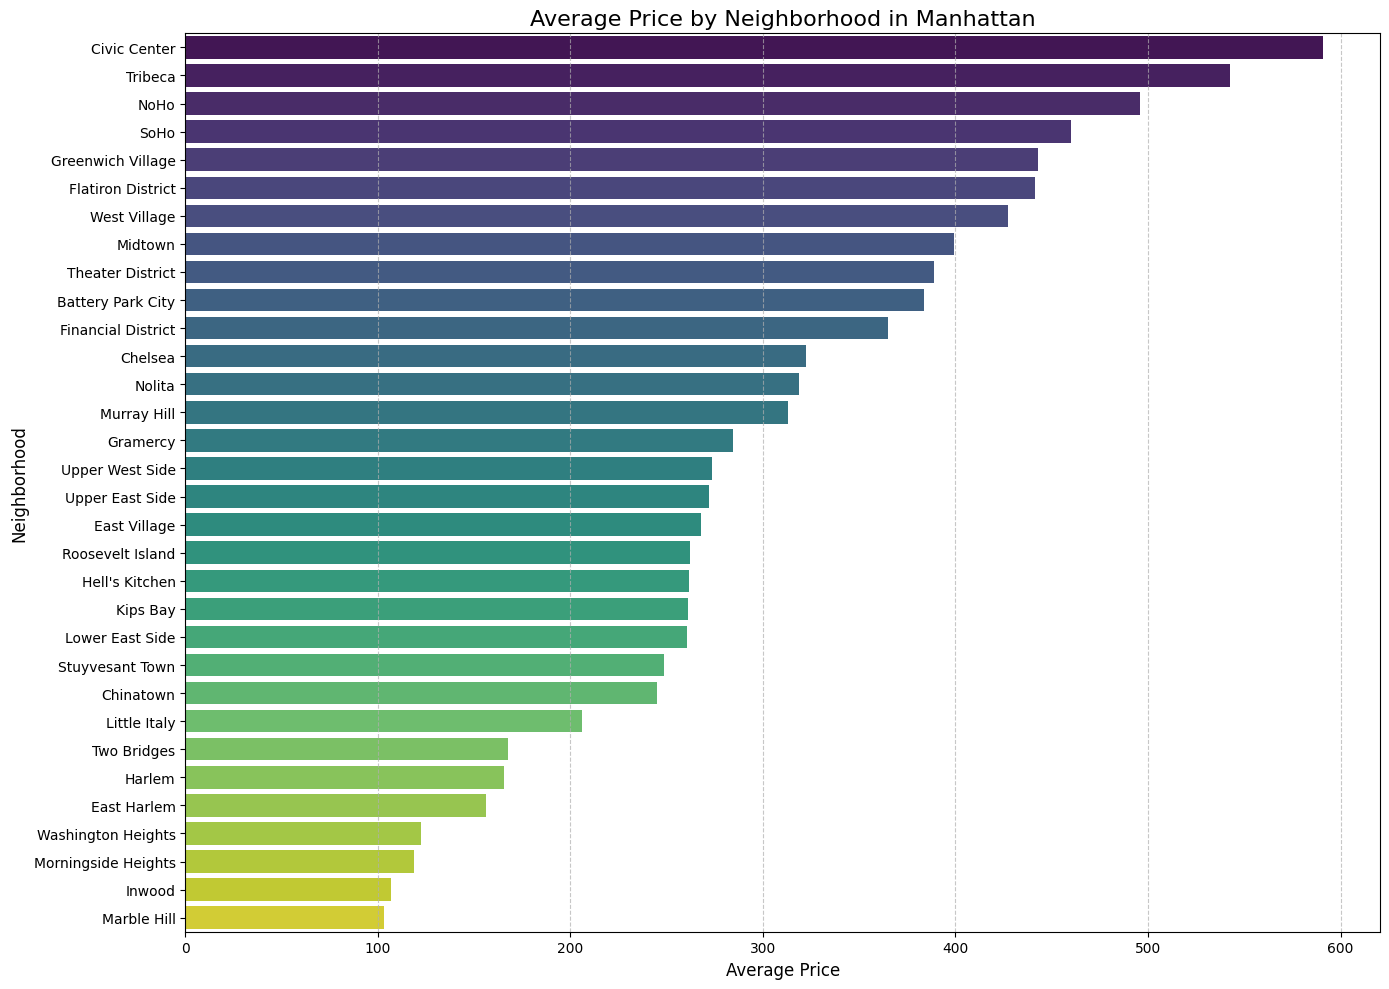

In [15]:
display(df[df['neighbourhood_group_cleansed'] == 'Manhattan']['neighbourhood_cleansed'].nunique())

manhattan_borough = df[df["neighbourhood_group_cleansed"] == "Manhattan"].copy()

manhattan_borough['log_price'] = np.log(manhattan_borough['price'])

plt.figure(figsize=(12,8))
sns.boxplot(data=manhattan_borough, x="log_price", y="neighbourhood_cleansed")

plt.title("Price Distribution by Manhattan Neighborhood (Log Scale)")
plt.xlabel("Log(Price)")
plt.ylabel("Neighborhood")
plt.show()

# Calculate the mean price for each Manhattan neighborhood again for clarity
manhattan_mean_by_neighbourhood = manhattan_borough.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 10))
sns.barplot(
    x='price',
    y='neighbourhood_cleansed',
    data=manhattan_mean_by_neighbourhood,
    palette='viridis'
)

plt.title('Average Price by Neighborhood in Manhattan', fontsize=16)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
manhattan_mean_by_neighbourhood = manhattan_borough.groupby('neighbourhood_cleansed')['price'].mean()
manhattan_range = (manhattan_mean_by_neighbourhood.max() - manhattan_mean_by_neighbourhood.min()) / manhattan_mean_by_neighbourhood.min() * 100
manhattan_range

np.float64(472.7676702189446)

In [17]:
manhattan_borough['neighbourhood_cleansed'].value_counts()


neighbourhood_cleansed
Midtown                13615
Harlem                 10170
Upper East Side         9875
Hell's Kitchen          9742
Upper West Side         8273
Chelsea                 5279
East Village            4417
East Harlem             3978
Financial District      3540
Lower East Side         3220
Murray Hill             3189
Washington Heights      2715
Kips Bay                2564
Theater District        2481
West Village            2341
Chinatown               1770
Gramercy                1520
SoHo                    1419
Tribeca                 1095
Nolita                  1030
Greenwich Village        817
Inwood                   740
Little Italy             716
Morningside Heights      577
Flatiron District        487
Battery Park City        302
Stuyvesant Town          246
Roosevelt Island         235
NoHo                     177
Two Bridges              142
Civic Center              69
Marble Hill               52
Name: count, dtype: int64

# Heatmap of Manhattan

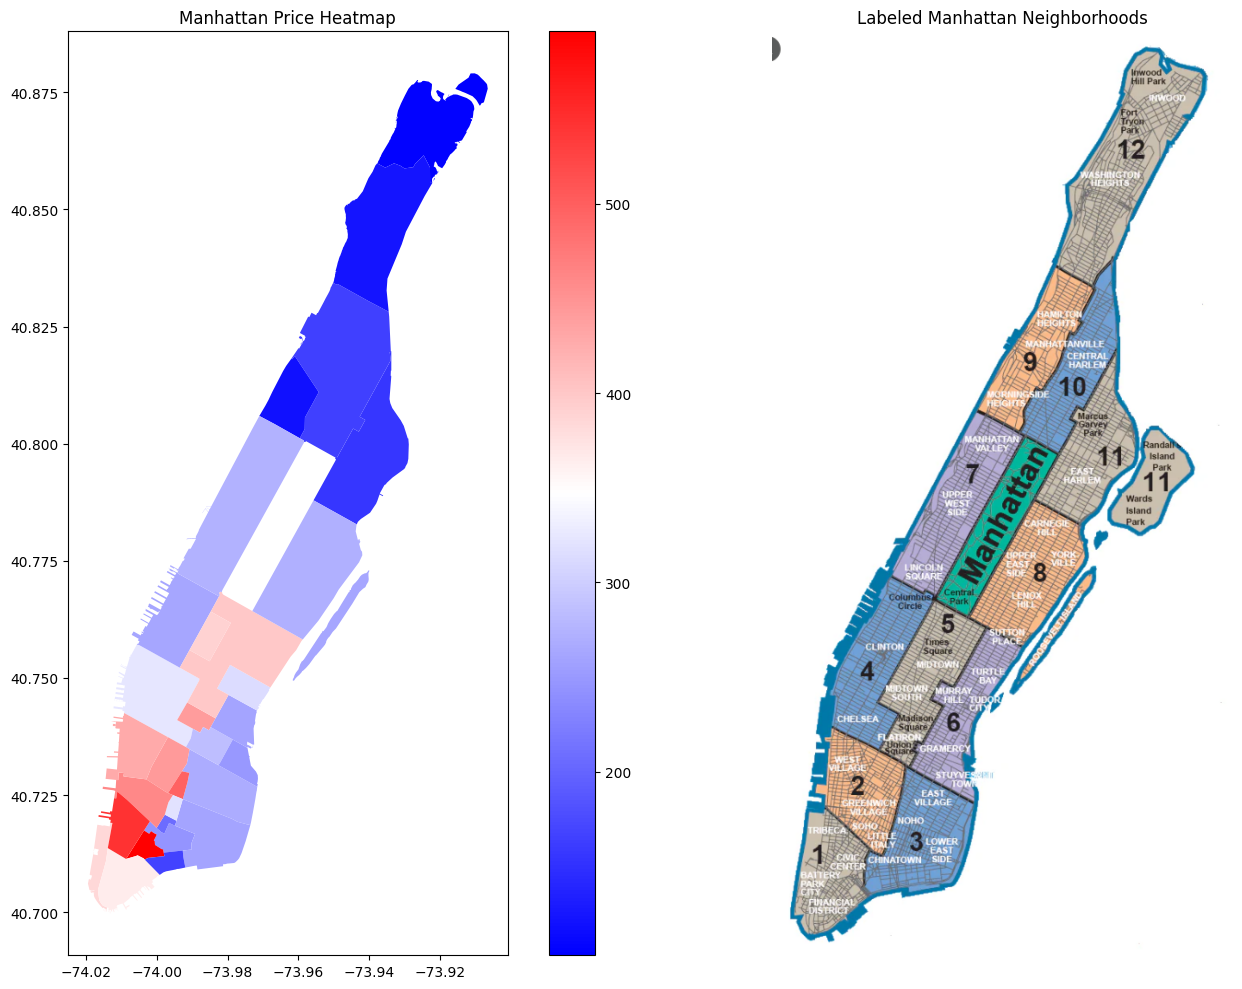

In [18]:
nyc_map = gpd.read_file("neighbourhoods_October_2025.geojson")
manhattan_map = nyc_map[nyc_map["neighbourhood_group"] == "Manhattan"]

# Average price per neighborhood
avg_price = df.groupby("neighbourhood_cleansed")["price"].mean().reset_index()

merged = manhattan_map.merge(avg_price, left_on="neighbourhood", right_on="neighbourhood_cleansed")

labeled_map = plt.imread("manhattan_neighborhoods.png")

fig, axes = plt.subplots(1, 2, figsize=(16,10))

merged.plot(
    column="price",
    cmap="bwr",
    legend=True,
    ax=axes[0]
)
axes[0].set_title("Manhattan Price Heatmap")

axes[1].imshow(labeled_map)
axes[1].axis("off")
axes[1].set_title("Labeled Manhattan Neighborhoods")

plt.tight_layout()
plt.show()

# Show Correlation Matrix of variables related to price

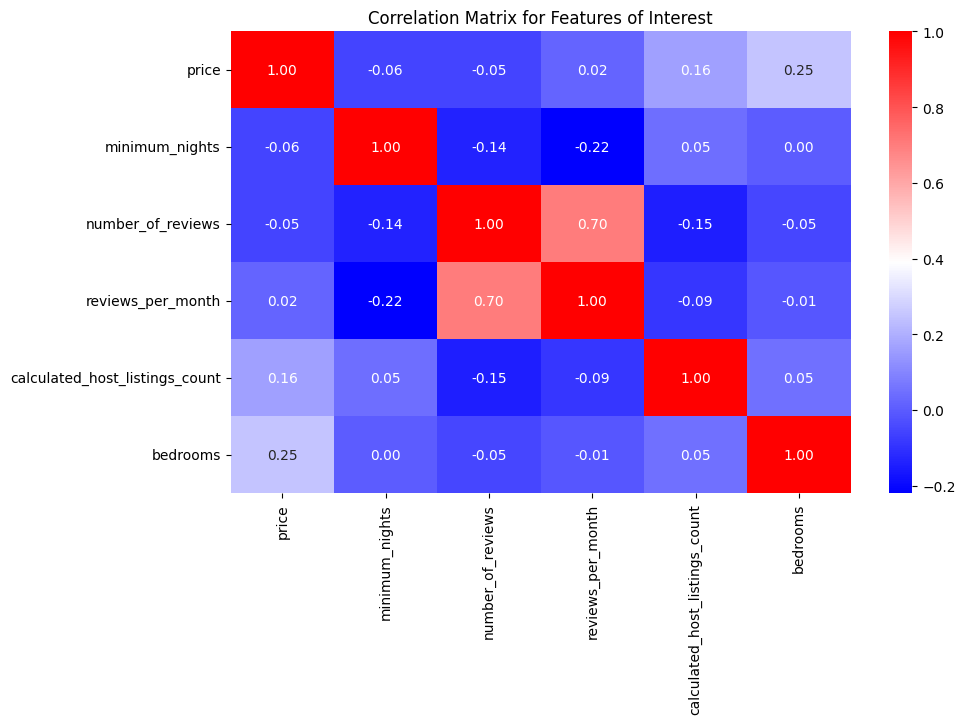

In [19]:
cols_of_interest = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'bedrooms']

corr = full_df[cols_of_interest].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='bwr')
plt.title('Correlation Matrix for Features of Interest')
plt.show()

# Let's check how price changes over seasons

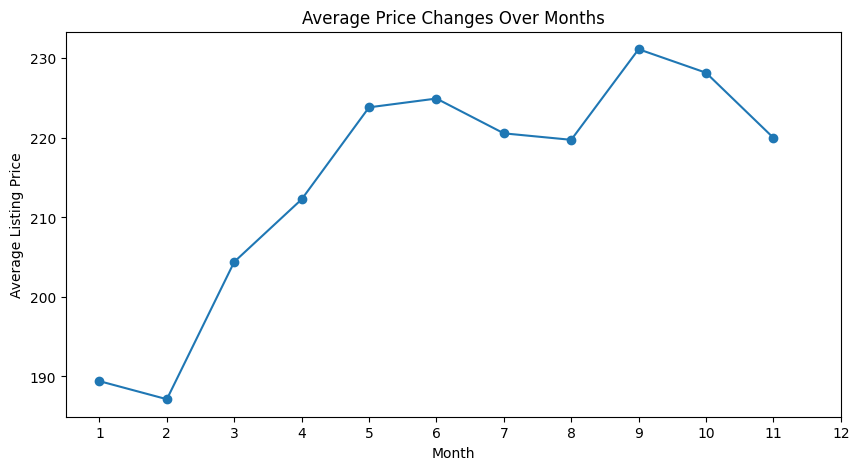

In [20]:
average_price_monthly = (full_df.groupby('month_num')['price'].mean().reset_index().sort_values('month_num'))

plt.figure(figsize=(10,5))
plt.plot(average_price_monthly['month_num'], average_price_monthly['price'], marker="o")
plt.title('Average Price Changes Over Months')
plt.xlabel('Month')
plt.ylabel('Average Listing Price')
plt.xticks(range(1, 13))
plt.show()

In [21]:
monthly_avg = full_df.groupby('month_num')['price'].mean()

pct_range = (monthly_avg.max() - monthly_avg.min()) / monthly_avg.min() * 100
pct_range

np.float64(23.525030703716475)

## Checking number of "luxury" listings over the months

In [22]:
luxury = full_df[full_df['price'] > 1000]
luxury.groupby('month_num').size()

month_num
1     227
2     219
3     286
4     280
5     316
6     315
7     306
8     287
9     343
10    337
11    302
dtype: int64